# Games dataset EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

games = pd.read_csv('/datasets/games.csv')

In [2]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Checking for duplicates and missing data.

In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
games.duplicated().sum()

0

In [6]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Preparing the data:

Changing column names to lowercase.

In [7]:
games.columns = games.columns.str.lower()

We need to fill in missing year releases with median value for platform type.
Changied the year comumn to intiger type. Missing years can be due to reporting so filling in with the median will help with further analysis.

In [8]:
games['year_of_release'] = games[['year_of_release', 'platform']].groupby('platform').ffill(-1).astype(int)

Filled in missing data in critic score with the -1 to indicate it has not been reviewed.
Changed the critic_score column type to intiger type. 
Missing data could mean that the game has yet to be reviewed professionally and changing it to the median value would change its representation.
Critic scores also tend to fluctuate between platforms, as well as between individual critics.

In [9]:
games['critic_score'] = games['critic_score'].fillna(-1).astype(int)


Filled in missing data in user score with the -1 to indicate missing data. Changed TBD to missing values and replaced all missing values. I did this because it is likely that many games didn't get review updates for the dataset, resulting in many missing values. I then change the user score into the same format as the crit rating and converted it to int type.

In [10]:
games['user_score'] = games['user_score'].replace('tbd', -1).fillna(-1).astype(float)
games['user_score'] = (games['user_score']*10).astype(int).replace(-10,-1)

Filling in the missing rating with undefined.

In [11]:
games['rating'] = games['rating'].fillna('Undefined')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,Undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,Undefined
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1,Undefined
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1,Undefined
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1,Undefined
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1,Undefined


Dealing with the missing name and genre columns. I decided to drop the coloumns because guessing to fill in the values would be troublesome and combersume. it represents less than 1% of the data so i dont believe it will impact the analysis of teh data.

In [12]:
games = games.dropna(subset=['name'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  int32  
 10  rating           16713 non-null  object 
dtypes: float64(4), int32(3), object(4)
memory usage: 1.3+ MB


Calculateed the total sales (the sum of sales in all regions) for each game and put these values in a total_sales column.

In [13]:
games['total_sales']= games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

C:\Users\Somil Patel\AppData\Local\Temp\ipykernel_15980\2117564471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['total_sales']= games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']


In [14]:
print(games['year_of_release'].max())
print(games['year_of_release'].min())

2016
1980


In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  int32  
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(5), int32(3), object(4)
memory usage: 1.5+ MB


# Analyze the data:

<Axes: title={'center': 'Games per year'}, xlabel='Year', ylabel='number of games'>

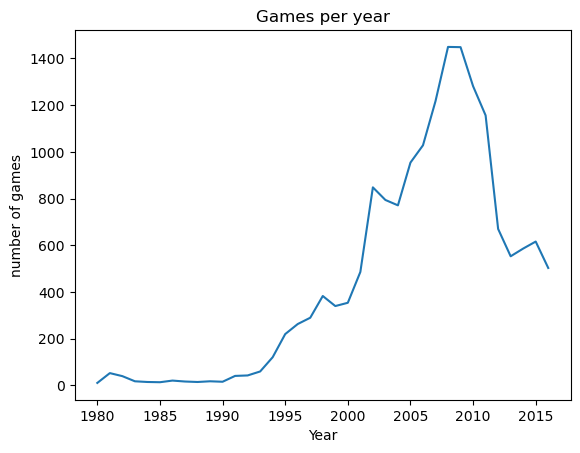

In [16]:
games['year_of_release'].value_counts().sort_index().plot(kind='line', xlabel= 'Year', ylabel= 'number of games', title= 'Games per year')

Looking at how many games were released in the different years. The data for every period dose not seem to be significant. up untill 1995 the number of games released were in the double digits. i believe the data from prior to 2005 to be of lesser value than the newer data from later years.

In [17]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.475977,0.263302,0.145045,0.077625,0.047343,33.064920,31.811644,0.533315
std,5.902656,0.813565,0.503359,0.308871,0.186742,36.299815,37.367155,1.548282
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,73.000000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,97.000000,82.540000


Used the describe method to get an overview of the sales for each region as well as total sales. The mean total sales for video games in the dataset is 533,396 (just over half a million). The max sales across all the regions ended up being North America region (NA) with the highest at 41.36 million, and japan being the lowest at 10.22 milllion.

<Axes: title={'center': 'Games Released by platform'}, xlabel='platform', ylabel='Number of Games'>

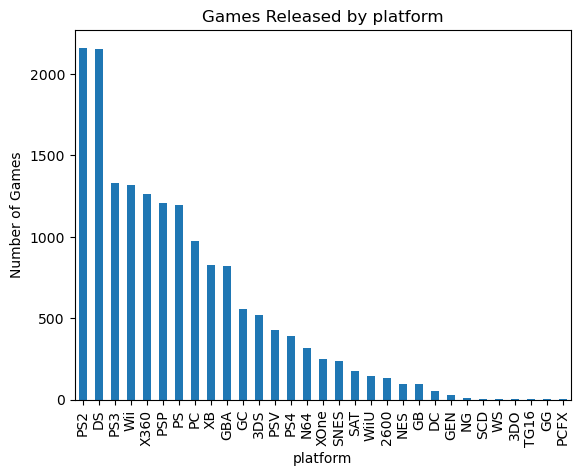

In [18]:
games['platform'].value_counts().plot(kind='bar', title= 'Games Released by platform', xlabel= 'platform', ylabel= 'Number of Games')

The PS2 and DS are much above the rest of teh platforms with both of them having over 2000 games released on those platforms. On the other end we have Gg and PCFX with only one game released for those platforms. Looking through the dataset it is apparent that it may not be fully accurate with all the sales and be have missing data for diffrent games that were released bt not recorded.

<Axes: title={'center': 'Games Released by Year'}, xlabel='Year', ylabel='Number of Games'>

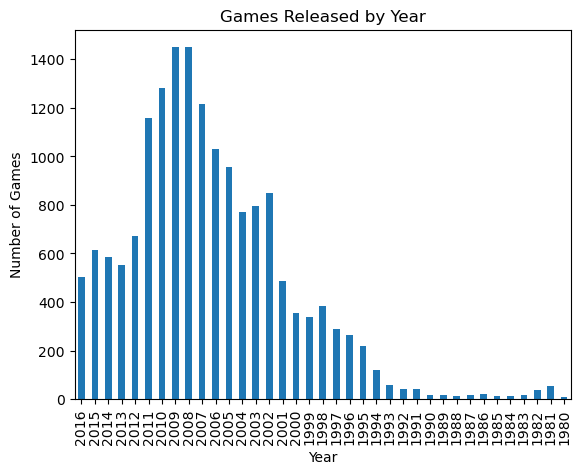

In [19]:
games['year_of_release'].value_counts().sort_index(ascending=False).plot(kind='bar', title= 'Games Released by Year', xlabel= 'Year', ylabel= 'Number of Games')

After 2000, the number of games released started to signifigantly increase.

<Axes: title={'center': 'Total Sales by platform'}, xlabel='Platform', ylabel='Total Sales'>

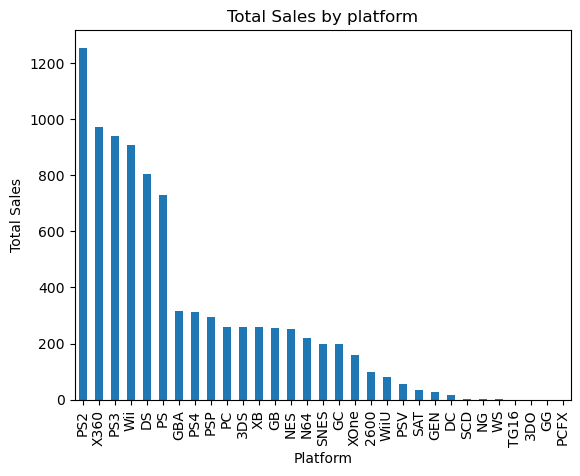

In [20]:
sales= games.groupby('platform')['total_sales'].agg('sum')
sales= sales.sort_values(ascending= False)
sales.plot(kind='bar', title= 'Total Sales by platform', xlabel= 'Platform', ylabel= 'Total Sales')

Found the top 5 platforms by total sales.

<Axes: xlabel='platform'>

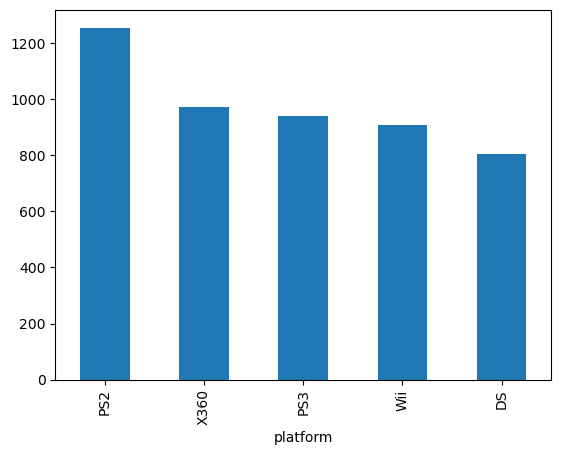

In [21]:
top_sellers = sales.head()
top_sellers.plot(kind='bar')

DataFrame of top selling platforms and filtered to year of release after 2000. The earliest release from the top platforms is the PS2 that launched back in 2000.

Text(0.5, 1.0, 'Top Platformse Sales over Time')

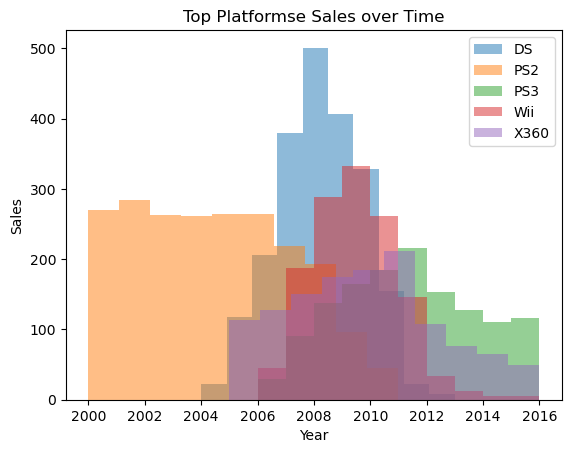

In [22]:
top_sell = games[games['platform'].isin(top_sellers.index)]
top_sell = top_sell[top_sell['year_of_release']>= 2000]
top_sell.groupby('platform')['year_of_release'].plot(kind='hist', alpha=.5, bins=10)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Top Platformse Sales over Time')

Text(0, 0.5, 'Sales')

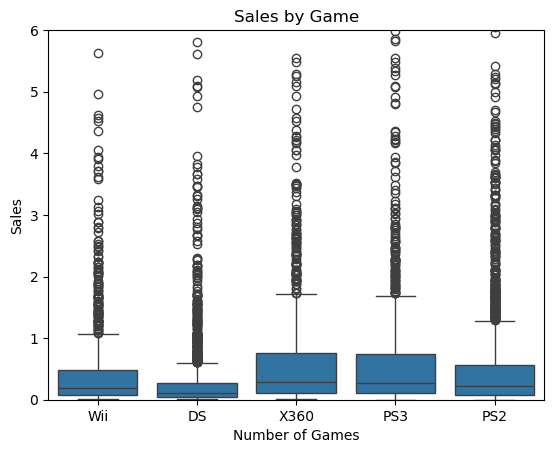

In [23]:
sns.boxplot(data= top_sell, x= 'platform', y= 'total_sales')
plt.ylim([0, 6])
plt.title('Sales by Game')
plt.xlabel('Number of Games')
plt.ylabel('Sales')

Text(0.5, 1.0, 'Sales over time')

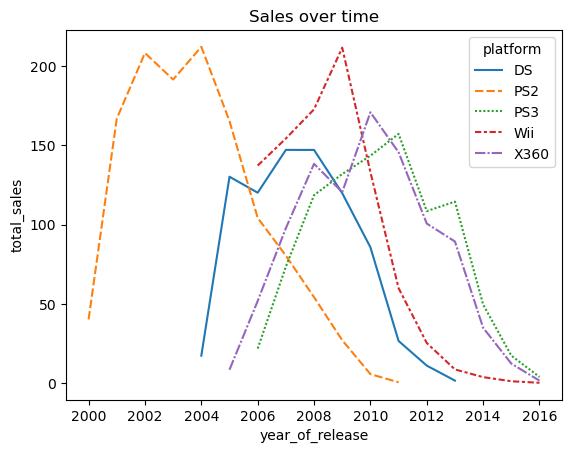

In [24]:
platform_sales_per_year = top_sell.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()
sns.lineplot(data= platform_sales_per_year,x='year_of_release', y='total_sales', hue='platform', style='platform')
plt.title('Sales over time')

In [25]:
zero_recent_sales = top_sell[top_sell['total_sales']==0]['platform'].unique()
zero_recent_sales

array(['PS3', 'PS2'], dtype=object)

In [26]:
plat_life = games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
plat_life.columns = ['platform', 'first_year', 'last_year']
plat_life['lifespan'] = plat_life['last_year']-plat_life['first_year']
plat_life['lifespan'].mean()

7.612903225806452

<Axes: xlabel='platform', ylabel='lifespan'>

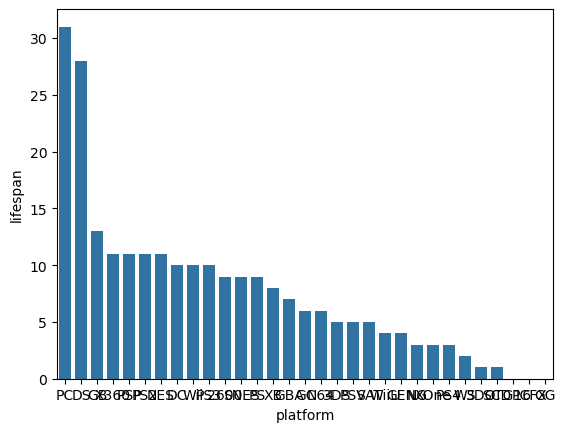

In [27]:
plat_life = plat_life.sort_values(by= 'lifespan', ascending=False)
sns.barplot(data= plat_life, x='platform',y= 'lifespan')

# Determine what period:
 To do so, I looked for the answers above. The data should allow me to build a model for 2017 and found the average lifespan of platforms to be around 7 years. I decided on a limit of 2012 and filtered the dataframe to be 2012 or later year.

In [28]:
recent_years = games[games['year_of_release']>=2012]


In [29]:
recent_years['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

Found the platforms that were sold in the filtered years.

Below I Fould the total sales for the platforms on the filtered dataframe. It looks as though only the top 5 are more profitible by a large margin.

In [30]:
foo= recent_years.groupby('platform').sum().sort_values(['total_sales'], ascending=False).reset_index()
foo[['platform','total_sales']]


,platform,total_sales
0,PS4,314.14
1,PS3,293.59
2,X360,238.54
3,3DS,195.20
4,XOne,159.32
5,WiiU,82.19
6,PC,65.04
7,PSV,49.44
8,Wii,38.93
9,DS,12.55


<Axes: xlabel='year_of_release', ylabel='total_sales'>

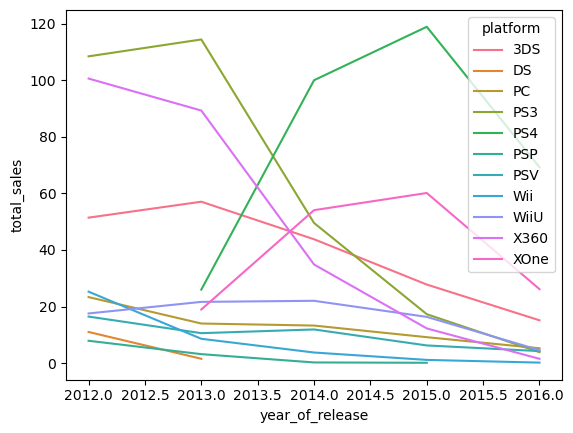

In [31]:
foo= recent_years.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'})
sns.lineplot(data=foo, x='year_of_release', y='total_sales', hue='platform')

Text(0.5, 1.0, 'Boxplot of game sales by platform')

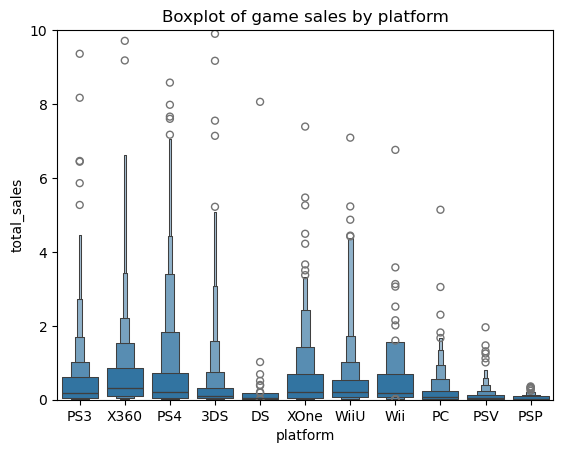

In [32]:
sns.boxenplot(data= recent_years, x='platform', y= 'total_sales')
plt.ylim([0,10])
plt.title('Boxplot of game sales by platform')

Built a box plot for the global sales of all games, broken down by platform. The differences in sales from platform to platform are significant whereas the average sales on various platforms seem to be similar. it seems as though PS4 and X360 are the top performers with PS3 as a runnerup behind the two.

In [33]:
recent_years.groupby('platform')['total_sales'].sum()

platform
3DS     195.20
DS       12.55
PC       65.04
PS3     293.59
PS4     314.14
PSP      11.43
PSV      49.44
Wii      38.93
WiiU     82.19
X360    238.54
XOne    159.32
Name: total_sales, dtype: float64

In [34]:
recent_years_top_plats = recent_years[recent_years['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])].reset_index()


In [35]:
recent_years_top_plats.groupby('platform')['total_sales'].sum()

platform
3DS     195.20
PS3     293.59
PS4     314.14
X360    238.54
XOne    159.32
Name: total_sales, dtype: float64

 In order to further analysis I filtered the dataframe further to only include games that are sold on the top 5 selling platforms. It looks as though PS4 has the greatest total sales with the PS3 in second for total sales.

# User/Critic Score

looked at how user and criitic reviews affect sales for three popular platform, the 3DS, PS4 and PS3. Due to the 3DS being a handheld device I believe it to be capable of having increased revenue than it currently has.I built a scatter plot of critic/user scores and total sales. I then calculated the correlation between the reviews and sales.

In [36]:
plat_data= recent_years_top_plats[recent_years_top_plats['platform'].isin(['3DS', 'PS4', 'PS3'])]



In [37]:
DS3= recent_years_top_plats[recent_years_top_plats['platform']=='3DS']

corr_critic= DS3[['critic_score','total_sales']].corr().iloc[0,1]
corr_user= DS3[['user_score','total_sales']].corr().iloc[0,1]
print(f'Correlation between Critic Score and Total Sales: {corr_critic}')
print(f'Correlation between User Score and Total Sales: {corr_user}')

Correlation between Critic Score and Total Sales: 0.14867829813880024
Correlation between User Score and Total Sales: 0.12795131382264255


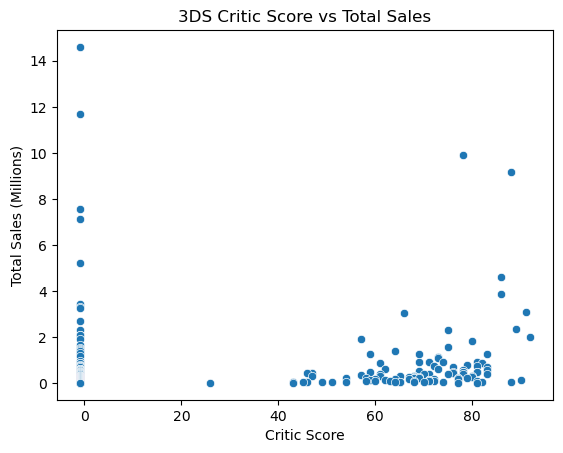

In [38]:
sns.scatterplot(data= DS3,x= 'critic_score', y='total_sales')
plt.title('3DS Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

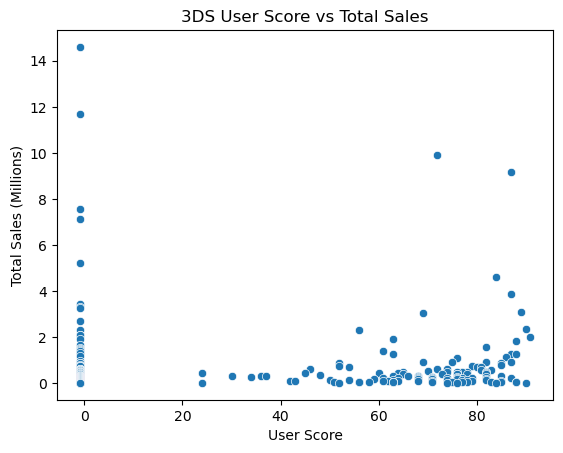

In [39]:
sns.scatterplot(data= DS3,x= 'user_score', y='total_sales')
plt.title('3DS User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

In [40]:
PS4= recent_years_top_plats[recent_years_top_plats['platform']=='PS4']

X360= recent_years_top_plats[recent_years_top_plats['platform']=='X360']
corr_critic= PS4[['critic_score','total_sales']].corr().iloc[0,1]
corr_user= PS4[['user_score','total_sales']].corr().iloc[0,1]
print(f'Correlation between Critic Score and Total Sales: {corr_critic}')
print(f'Correlation between User Score and Total Sales: {corr_user}')

Correlation between Critic Score and Total Sales: 0.22652606614612347
Correlation between User Score and Total Sales: 0.11344360244510017


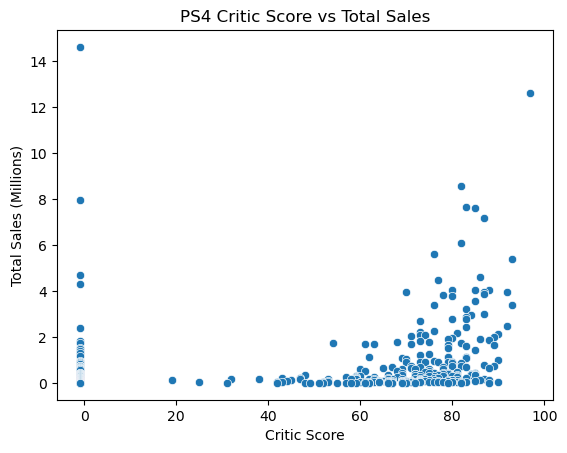

In [41]:
sns.scatterplot(data= PS4,x= 'critic_score', y='total_sales')
plt.title('PS4 Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

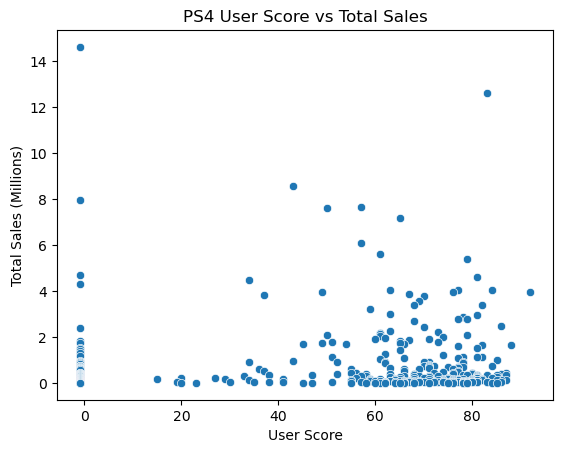

In [42]:
sns.scatterplot(data= PS4,x= 'user_score', y='total_sales')
plt.title('PS4 User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

In [43]:
PS3= recent_years_top_plats[recent_years_top_plats['platform']=='PS3']
corr_critic= PS3[['critic_score','total_sales']].corr().iloc[0,1]
corr_user= PS3[['user_score','total_sales']].corr().iloc[0,1]
print(f'Correlation between Critic Score and Total Sales: {corr_critic}')
print(f'Correlation between User Score and Total Sales: {corr_user}')

Correlation between Critic Score and Total Sales: 0.29960558823847305
Correlation between User Score and Total Sales: 0.21419213977589188


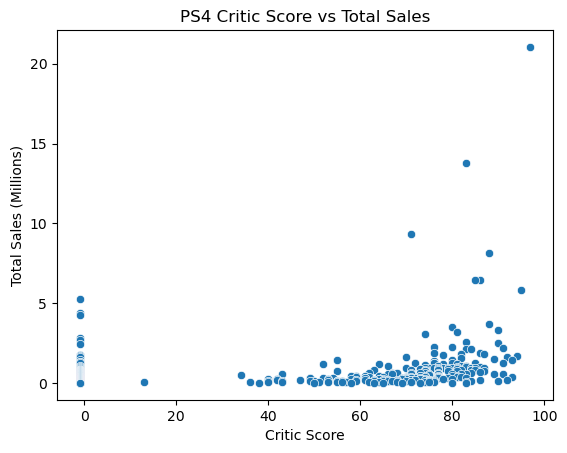

In [44]:
sns.scatterplot(data= PS3,x= 'critic_score', y='total_sales')
plt.title('PS4 Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

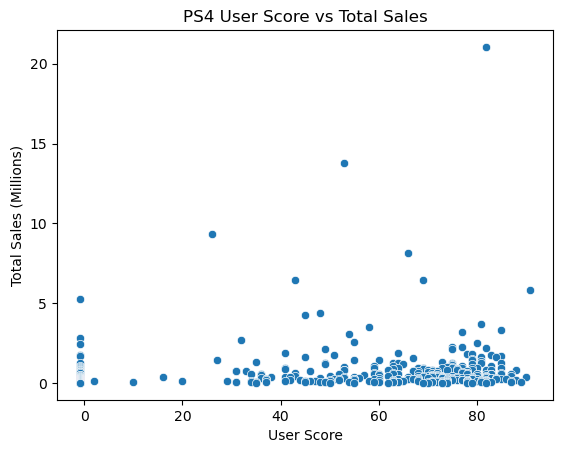

In [45]:
sns.scatterplot(data= PS3,x= 'user_score', y='total_sales')
plt.title('PS4 User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

Overall the user and critic reviews have little influence on the game sales with critics having more of a correlation than users.There is a slightly positive correlation between the reviews and total sales for both groups.On average the users tend to rate higher than critics. However, the critic scores seem to be less dispersed than the user reviews.

# Same games on diffrent platforms

In [46]:
recent_years_top_plats['name'] = recent_years_top_plats['name'].str.lower()
recent_years_top_plats

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05
1,23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27
2,31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,Undefined,14.63
3,33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1,Undefined,14.60
4,34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,53,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,16672,metal gear solid v: the definitive experience,XOne,2016,Action,0.01,0.00,0.00,0.00,-1,-1,M,0.01
1841,16674,tsukigime ranko's longest day,PS3,2014,Action,0.00,0.01,0.00,0.00,-1,-1,Undefined,0.01
1842,16677,aikatsu stars! my special appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,-1,-1,Undefined,0.01
1843,16691,dynasty warriors: eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1,Undefined,0.01


In [47]:
same_games= recent_years_top_plats[recent_years_top_plats['name'].duplicated(keep=False)].reset_index(drop=True)
same_games= same_games.drop( 'index', axis=1)
same_games = same_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()


In [48]:
same_games

,name,platform,total_sales
0,2014 fifa world cup brazil,PS3,0.61
1,2014 fifa world cup brazil,X360,0.43
2,7 days to die,PS4,0.14
3,7 days to die,XOne,0.05
4,[prototype 2],PS3,0.74
...,...,...,...
1143,zombiu,XOne,0.01
1144,zone of the enders hd collection,PS3,0.42
1145,zone of the enders hd collection,X360,0.20
1146,zoo tycoon (2013),X360,0.09


Pivot Table of total sales of games across platforms.

In [49]:
comparison_table = same_games.pivot(index='name', columns='platform', values='total_sales')

comparison_table.head(10)

platform,3DS,PS3,PS4,X360,XOne
name,,,,,
2014 fifa world cup brazil,NaN,0.61,NaN,0.43,NaN
7 days to die,NaN,NaN,0.14,NaN,0.05
[prototype 2],NaN,0.74,NaN,0.79,NaN
adventure time: explore the dungeon because i don't know!,0.14,0.04,NaN,0.08,NaN
adventure time: finn & jake investigations,0.09,0.08,0.10,0.09,0.05
adventure time: the secret of the nameless,0.01,NaN,NaN,0.01,NaN
adventure time: the secret of the nameless kingdom,0.07,NaN,NaN,0.05,NaN
aegis of earth: protonovus assault,NaN,0.02,0.02,NaN,NaN
agatha christie's the abc murders,NaN,NaN,0.02,NaN,0.01


In [50]:
x= same_games.groupby('name')['total_sales'].sum().nlargest(10).index
top_games= same_games[same_games['name'].isin(x)]
top_games.pivot_table(index= 'name', columns='platform', values= 'total_sales')

platform,3DS,PS3,PS4,X360,XOne
name,,,,,
call of duty: advanced warfare,NaN,4.36,7.66,4.28,5.26
call of duty: black ops 3,NaN,1.69,14.63,1.70,7.39
call of duty: black ops ii,NaN,13.79,NaN,13.68,NaN
call of duty: ghosts,NaN,9.36,3.83,10.24,2.92
fifa 14,0.23,6.46,3.01,4.22,1.16
fifa 15,0.46,4.28,6.08,2.92,2.18
fifa 16,NaN,2.70,8.58,1.57,3.25
fifa soccer 13,0.29,8.17,NaN,5.16,NaN
grand theft auto v,NaN,21.05,12.62,16.27,5.47


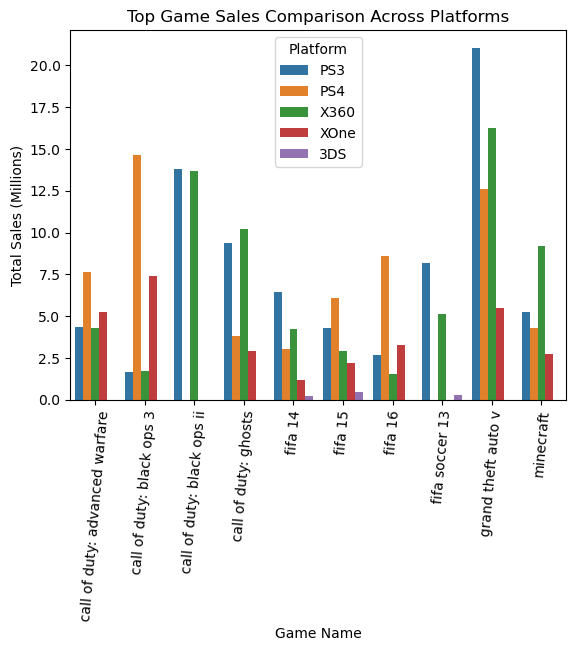

In [51]:
sns.barplot(data=top_games, x='name', y='total_sales', hue='platform')
plt.title('Top Game Sales Comparison Across Platforms')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=85)
plt.legend(title='Platform')
plt.show()

Looking at the plot and chart it seems as though PS3 and PS4 have a a higher total amount of revenue on average when comparing to XOne or the other platforms.

# Genre

In [52]:
recent_years_top_plats.groupby('genre')['total_sales'].sum()

genre
Action          379.40
Adventure        22.80
Fighting         35.53
Misc             50.77
Platform         34.13
Puzzle            2.87
Racing           42.23
Role-Playing    151.34
Shooter         282.76
Simulation       25.30
Sports          168.83
Strategy          4.83
Name: total_sales, dtype: float64

In [53]:
recent_years_top_plats.groupby('genre')['total_sales'].sum().nlargest(5)

genre
Action          379.40
Shooter         282.76
Sports          168.83
Role-Playing    151.34
Misc             50.77
Name: total_sales, dtype: float64

I seems as though Action, Role-Playing, Shooter, and Sports are the top selling genres on the top platforms. These genres are the more popular titles that are probably released across multiple platforms. I wouldent say it would be fair to generalize a genre based on the sales but ones like Strategy and Puzzle are more nich gaming communities so marketing for those genres would produce little revenue. In order to maximize profit choosing Action or Shooter would be the best choices to promote for future sales.

# Create a user profile for each region:

In [54]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
platform_sales = recent_years.groupby('platform')[regions].sum().reset_index()
platform_sales['total_sales'] = platform_sales[regions].sum(axis=1).sort_values()
platform_sales.groupby('platform')['total_sales'].sum().nlargest(5)

platform
PS4     265.79
PS3     249.73
X360    217.96
3DS     186.28
XOne    145.05
Name: total_sales, dtype: float64

- Top 5 Platforms by Region:

In [55]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_platforms = recent_years.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top 5 platforms in {region}:\n{top_platforms}\n")

Top 5 platforms in na_sales:
platform
X360    141.39
PS4     108.74
PS3     105.53
XOne     93.12
3DS      55.61
Name: na_sales, dtype: float64

Top 5 platforms in eu_sales:
platform
PS4     141.09
PS3     108.20
X360     75.00
XOne     51.59
3DS      42.85
Name: eu_sales, dtype: float64

Top 5 platforms in jp_sales:
platform
3DS     87.82
PS3     36.00
PSV     21.11
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64



NA has sales greater total sales compared to EU and JP. The hightest platform in NA was the X360 but overall X360 came in 3rd over the regions. The PS4 and PS3 in NA came second and third in sales respectively.Looking at Eu the PS4 and PS3 came ahead by almost twice the amount as the X360. When looking at JP the top selling platform was the 3DS but the total revenue is much lesser than NA and less than EU as well. The PS3 came second and the PS4 was in 4th for JP top platforms by sales.

- Top 5 Genre by Region:

In [56]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_genre = recent_years.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top 5 genres in {region}:\n{top_genre}\n")

Top 5 genres in na_sales:
genre
Action          180.96
Shooter         145.88
Sports           82.43
Role-Playing     64.11
Misc             39.55
Name: na_sales, dtype: float64

Top 5 genres in eu_sales:
genre
Action          161.73
Shooter         114.36
Sports           69.50
Role-Playing     48.58
Racing           27.34
Name: eu_sales, dtype: float64

Top 5 genres in jp_sales:
genre
Role-Playing    65.59
Action          53.55
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64



The genres for Na and EU sales by genre are similar in the genres that were top sellers. the top 4 for both regions in the same with the 5th place being diffrent. The overall sales from NA was higher than the other regions. JP sales were less with the most popular genres being diffrent from NA and EU for the top 5 genres.

- Top 5 ESRB(rating) by Region:

In [57]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_esrb = recent_years.groupby('rating')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top 5 ESRB in {region}:\n{top_esrb}\n")

Top 5 ESRB in na_sales:
rating
M            233.23
E            114.98
Undefined    103.44
E10+          77.81
T             68.47
Name: na_sales, dtype: float64

Top 5 ESRB in eu_sales:
rating
M            195.65
E            113.07
Undefined     91.74
E10+          56.67
T             54.03
Name: eu_sales, dtype: float64

Top 5 ESRB in jp_sales:
rating
Undefined    109.17
E             28.33
T             26.09
M             21.84
E10+           8.19
Name: jp_sales, dtype: float64



In NA and EU the top selling ESRB in M and E with unrated games coming in third. When loking at the JP sales it seems as though the rating dose play a arole i their performance. Undefined rating was the top seller in JP with E and T coming in second and third. JP may have more children in the population playing games rather than adults resulting in lower M sales there.

# Test the following hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same.

Testing the Hypothesis that the average user rating for the XOne and PC platforms are the same. My Null hypothesis being that the XOne and PC are the same. The Alternative hypothesis being that the scores are not the same. After conducting the statistical test comparing the two,  with an alpha value of .05 to have a 5% varience, I concluded that the XOne and PC reviews are the same because we cant reject the null hypotesis at the 5% signifigance level.

In [58]:
XOne= recent_years[recent_years['platform']== 'XOne']['user_score']
PC= recent_years[recent_years['platform']== 'PC']['user_score']
alpha=.05
results= st.ttest_ind(XOne,PC)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.06391047863167888
We can't reject the null hypothesis


- Average user ratings for the Action and Sports genres are different.

For the genres Action and Sport and whether or not the user scores were diffrent, I formulated the null hypothesis that Action and Shooter genres have the same scores. I chose a alpha value of .05 with the alternative hypothesis being that they are diffrent. We reject the null hypothesis at a 5% signifigance level.

In [59]:
Action= recent_years[recent_years['genre']== 'Action']['user_score']
Sports= recent_years[recent_years['genre']== 'Sports']['user_score']
alpha=.05
results= st.ttest_ind(Action,Sports)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.03387715747356737
We reject the null hypothesis


# General Conclusion

As I was prepareing The data, I delt with the missing values and enhanced the data for further analysis. I plotted charts and graphs to visualize the distribution and a general overview of the data to further help my understanding and analysis. when looking at the sales over time, in 2000 the market started booming with an increase in sales peaking around 2008-2009. When I saw the market restabalize in 2012, I decided to filter the dataset from that date onward to have more relevent data to make a better judgment on what to campaign for. The top platforms that are leading in sales are the PS4, PS3, and X360 with the PS2 dropping with the newer platform releases from the company. 

The NA and EU sales are similar with JP being diffrent in its type of sales. The top 3 platforms for NA and EU are the PS4, PS3 and X360. In JP they are the 3DS, PS3 and PSV. The ESRB for japan in the M and T catagories are lesser than teh otehr regions, with JP having Undefined and E as their top ratings while in NA/EU it was M and T. The top genres for NA/EU are basically the same with JP again being diffrent from the other regions.

When thinking about what product/game to market for, it seems as though it would be best to market for popular genres that are avaible on multiple platforms and fall within the Action genre. I Anticipate that games like Call of Duty and Grand Theft Auto would be good to make a campaign for to increase sales and revenue. Since the most abundent sales are in NA, with EU in second, targeting consumers in those regions could yeild greater profits.